# DE Analysis (DEA)

## Load `msmu` and mdata to be used.

Use mdata processed in tutorials `DDA-TMT`, `DDA-LFQ`, or `DIA-LFQ`. `mdata` should have a modality to test, in this case, `protein`.

If mdata were saved locally, provide the path to the file in `mm.read_h5mu()` function.

Or `mdata` object can be loaded from the previous tutorial directly.


In [1]:
import msmu as mm

# Set default renderer to static image for better compatibility
import plotly.io as pio

pio.renderers.default = "png"

mdata = mm.read_h5mu("dda_lfq_PXD012986.h5mu")

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


## Run DE analysis

Permutation-based DE analysis basically provided by `mm.tl.run_de()` function. Here, we will compare two conditions, `G1` and `G2`, in the `condition` column of `mdata.obs`.

`modality` specifies which modality to perform DE analysis on. `category` indicates the column name in `mdata.obs` that contains the group labels.

`ctrl` and `expr` define the control and experimental groups, respectively.

`stat_method` allows you to choose the statistical test method, such as "welch", "student", or "wilcoxon". ]

`n_resamples` sets the number of resampling iterations for permutation testing; if set to `None`, simple parametric p-values are computed.

`fdr` specifies the multiple testing correction method, which can be "empirical", "bh" (Benjamini-Hochberg), or `None`.

More explanation for `run_de()` can be found in the [DE Analysis](../how-it-works/dea.md) documentation and the [`mm.tl.run_de()`]() API reference.

In an example below, we assign 1000 resamples, but only 20 permutations are performed because each group has 3 samples and 3 by 3 gives 20 combinations, which is `exact` test.


In [2]:
de_res = mm.tl.run_de(
    mdata,
    modality="protein",
    category="condition",  # category in .obs to define groups
    ctrl="G1",  # control group
    expr="G2",  # experimental group
    stat_method="welch",  # statistical test method: "welch", "student", "wilcoxon"
    n_resamples=1000,  # by default, 1000 resamples; if None, simple parametric p-values are computed
    fdr="empirical",  # multiple testing correction method: "empirical", "bh", or None, default "empirical"
)

Running Permutations: 100%|██████████| 20/20 [00:00<00:00, 1169.32it/s]


Result is stored in `PermutationTestResult` object. And the object provides few methods to explore the results.


In [3]:
de_res

PermTestResult(stat_method='welch', ctrl='G1', expr='G2', features=array(['A0A023T778,G3UZW7,P61327,Q9CQL1',
       'A0A068CB13,A2QBC3,B2CNX8,B2CNX9,G3XSF9,I6VCW8,P13006',
       'A0A087WNT1,A0A087WPE4,A0A087WQE6,P83940', ..., 'Q9Z2U0', 'Q9Z2X1',
       'Q9Z315'], shape=(1463,), dtype=object), median_ctrl=array([23.03245163, 25.0835495 , 25.42064857, ..., 26.58754539,
       25.65559196, 22.32104683], shape=(1463,)), median_expr=array([23.09072113, 28.7356205 , 25.33166504, ..., 26.36597824,
       25.99711609, 22.34777641], shape=(1463,)), pct_ctrl=array([100., 100., 100., ..., 100., 100., 100.], shape=(1463,)), pct_expr=array([100., 100., 100., ..., 100., 100., 100.], shape=(1463,)), log2fc=array([ 0.0582695 ,  3.652071  , -0.08898354, ..., -0.22156715,
        0.34152412,  0.02672958], shape=(1463,)), p_value=array([4.43267461e-01, 1.73653319e-04, 9.70617859e-01, ...,
       1.88830619e-01, 1.24439968e-01, 8.42670093e-01], shape=(1463,)), q_value=array([0.81257054, 0.07543224, 0.904

In [4]:
de_res.to_df().head()

,features,median_ctrl,median_expr,pct_ctrl,pct_expr,log2fc,p_value,q_value
0,"A0A023T778,G3UZW7,P61327,Q9CQL1",23.032452,23.090721,100.0,100.0,0.058270,0.443267,0.812571
1,"A0A068CB13,A2QBC3,B2CNX8,B2CNX9,G3XSF9,I6VCW8,...",25.083549,28.735620,100.0,100.0,3.652071,0.000174,0.075432
2,"A0A087WNT1,A0A087WPE4,A0A087WQE6,P83940",25.420649,25.331665,100.0,100.0,-0.088984,0.970618,0.904400
3,"A0A087WNT3,A0A087WNU9,A0A087WP64,A0A087WPE6,A0...",NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,"A0A087WNY6,A0A087WQA5,A0A087WQX8,A0A087WRP4,A0...",25.827114,25.794582,100.0,100.0,-0.032532,0.821623,0.881836


After permutation test, guidance for log2FC threshold at 5% (or 1%) on two-sided tails of null distribution from permutations is also provided.


In [5]:
print(f"Log2FC threshold at 5%: {de_res.fc_pct_5}")

Log2FC threshold at 5%: 0.33


To visualize the DE results, `plot_volcano()` method is available. Log2FC and p-value thresholds can be set manually or automatically using the `fc_pct_5` attribute from the result object and p-value of `0.05`.

Top significant features can be labelled using `label_top` parameter (sorted by log2FC).


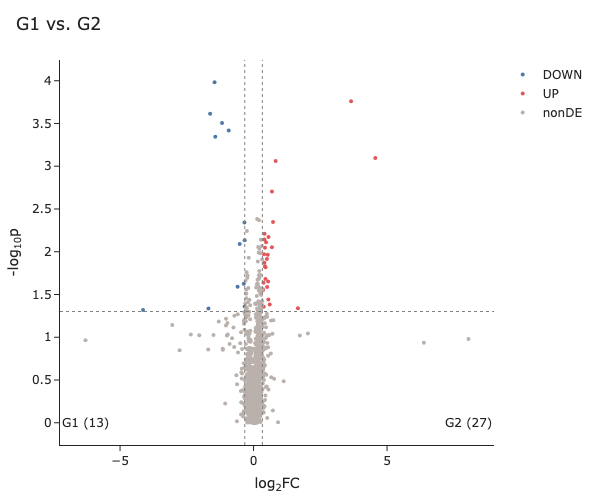

In [6]:
de_res.plot_volcano()

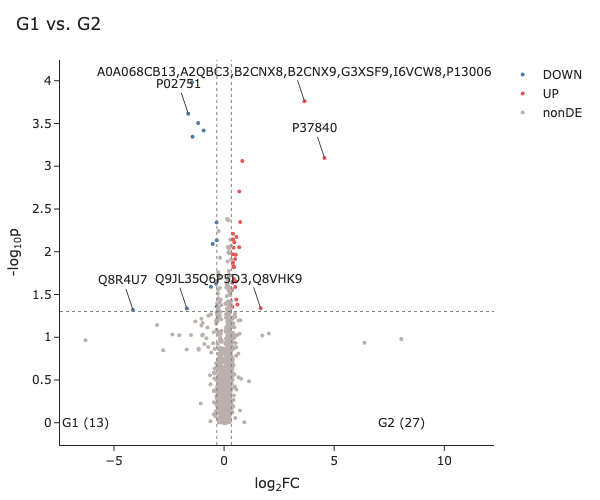

In [7]:
de_res.plot_volcano(label_top=3)